In [1]:
%load_ext autoreload
%autoreload 2
#%matplotlib notebook
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import sys
sys.path.append('../') if '../' not in sys.path else None 
from methods import *
from plotting_functions import *

In [3]:
nx,ny = 1,1 # board size
res = 64

# initialize board
xx, yy = np.meshgrid(
    np.linspace(-nx/2, nx/2, res),
    np.linspace(-ny/2, ny/2, res),
)
board = np.stack([xx, yy], axis=-1)

# initialize grid module
f = 1
orientation_offset = 0
center = np.zeros(2)

squaregridmodule = SquareGridModule(center,orientation_offset,f,non_negative=False,add=True)

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

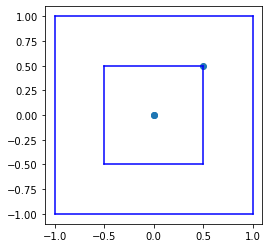

In [64]:
#phases = center[None]
#phases = squaregridmodule.inner_square.sample(3)
#phases = np.stack([center] + [np.array([2*0.5/f, 0])] + [np.array([0, 2*0.5/f])],axis=0)
#phases = np.stack([center] + [np.array([0.5/f, 0])] + [np.array([0, 0.5/f])],axis=0)
phases = np.stack([center] + [center] + [np.array([0.5/f, 0.5/f])],axis=0)


squaregridmodule.init_module(phases)
squaregridmodule.plot()

In [65]:
ratemaps = squaregridmodule(board).T
ratemaps.shape

(64, 64, 3)

0.22389776312713205

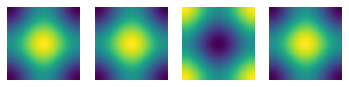

In [66]:
#plt.plot(data.reshape(-1,3))
fig,axs = plt.subplots(ncols=ratemaps.shape[-1]+1)
for i,ax in enumerate(axs[:-1]):
    ax.imshow(ratemaps[...,i])
    ax.axis('off')
axs[-1].imshow(np.sum(ratemaps,axis=-1))
axs[-1].axis('off')
np.std(np.sum(ratemaps,axis=-1))

(<Figure size 720x720 with 12 Axes>,
 array([[<Axes3DSubplot:>, <Axes3DSubplot:>, <Axes3DSubplot:>,
         <Axes3DSubplot:>],
        [<Axes3DSubplot:>, <Axes3DSubplot:>, <Axes3DSubplot:>,
         <Axes3DSubplot:>],
        [<Axes3DSubplot:>, <Axes3DSubplot:>, <Axes3DSubplot:>,
         <Axes3DSubplot:>]], dtype=object))

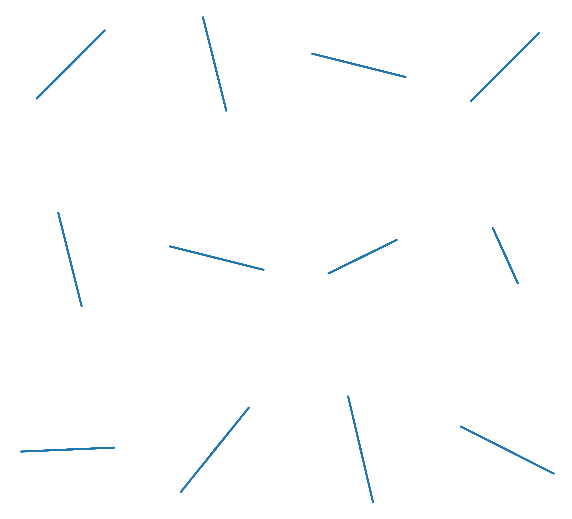

In [67]:
scatter3d(ratemaps, nrows=3, ncols=4, s=0.1, alpha=0.5, figsize=(10,10))